## Initializating Tensorflow and defining model

In [0]:
import tensorflow as tf

tf.set_random_seed(0)

In [0]:
# creating placeholder for input with 28x25x1 dimension
# None: for number of images (batch size) to be filled later
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# initializing weights of size 784x10 with zeroes matrix
W = tf.Variable(tf.zeros([784, 10]))

b = tf.Variable(tf.zeros([10]))

In [0]:
# Flattening Images
X_f = tf.reshape(X, [-1, 784])

In [0]:
# Model
Y = tf.nn.softmax(tf.matmul(X_f, W) + b)

In [0]:
# placeholder for correct answers (one-hot encoded)
# None for batch size
Y_actual = tf.placeholder(tf.float32, [None, 10])

In [0]:
# Loss function
cross_entropy = -tf.reduce_sum(Y_actual * tf.log(Y))

# normalized for batches of images,
# x10 because "mean" included an unwanted division by 10

In [0]:
# % of correct answers found in batch
# its one-hot decoding
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_actual, 1))
accuracy = tf.reduce_sum(tf.cast(is_correct, tf.float32))

In [0]:
lr = 0.003
optimizer = tf.train.GradientDescentOptimizer(lr)
train_step = optimizer.minimize(cross_entropy)

## Training

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data", one_hot=True, reshape=False)

W0712 02:03:50.017142 139848193525632 deprecation.py:323] From <ipython-input-9-7795c5bee769>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0712 02:03:50.019323 139848193525632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0712 02:03:50.024145 139848193525632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz


W0712 02:03:51.594032 139848193525632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0712 02:03:51.597114 139848193525632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz


W0712 02:03:52.312249 139848193525632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
batch_size = 100
for i in range(2):
  # load batch of images and correct labels
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  train_data = {X: batch_x, Y_actual: batch_y}
  train_data
  
  # Training
  sess.run(train_step, feed_dict=train_data)
  
  # success rate
  acc, cost = sess.run([accuracy, cross_entropy], feed_dict=train_data)
  
  # checking success on test data (validation)
  test_data = {X: mnist.test.images, Y_actual: mnist.test.labels}
  v_acc, v_cost = sess.run([accuracy, cross_entropy], feed_dict=test_data)
  print("Epoch %d => acc: %f, cost: %f; val_acc:%f, val_cost: %f" % (i+1, acc, cost, v_acc, v_cost))
  
# Saving model
saver = tf.train.Saver()
save_path = saver.save(sess, 'model/mnist-ann-model.ckpt')
print("Model saved at {:s}".format(save_path))

Epoch 1 => acc: 84.000000, cost: 69.106651; val_acc:8187.000000, val_cost: 7807.264648
Epoch 2 => acc: 91.000000, cost: 61.523201; val_acc:8354.000000, val_cost: 7557.145508
Model saved at model/mnist-ann-model.ckpt


In [0]:
saver.save?

More about saving tensorflow model: https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/

### Loading model from saved files

In [0]:
#Start with resetting the default graph
tf.reset_default_graph()

with tf.Session() as sess:
  # First load meta graph 
  saver = tf.train.import_meta_graph("model/mnist-ann-model.ckpt.meta")
  
  # now load the weights
  saver.restore(sess, tf.train.latest_checkpoint('model/'))
  
  print('Model restored.')
#   Z = logits.eval(feed_dict={x: submission_test})
#   y_pred = np.argmax(Z, axis=1)
#   print(len(y_pred))

Model restored.


In [0]:
from google.colab import files

uploaded = files.upload()

file_name = ''
for fn in uploaded.keys():
  file_name = fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=file_name, length=len(uploaded[file_name])))

Saving five.png to five.png
User uploaded file "five.png" with length 5082 bytes


In [0]:
# test_image = tf.image.decode_png(image,channels=3)
test_image = tf.image.resize_images(image, [28, 28, 1])


ValueError: ignored

TypeError: ignored

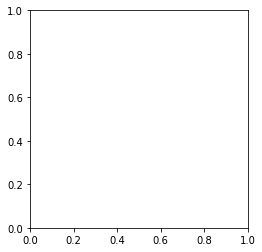

In [0]:
import matplotlib.pyplot as plt
import numpy as np

image = plt.imread("./five.png")

image = image.astype(np.float).resize(28, 28)
plt.imshow(image)

In [0]:
with tf.Session() as sess:
  sess.run(init)
  prediction = sess.run(image)

TypeError: ignored